In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from math import exp


In [32]:
def GetLaguerre(n):
    x = sym.Symbol('x', Real=True)
    y = sym.Symbol('y',Real=True)
    y = (x**n * sym.exp(-x))
    
    p= (sym.exp(x) * sym.diff(y,x,n))/np.math.factorial(n)
    return p

In [48]:
Laguerre = []
DerLaguerre = []
n=20


for i in range(n+1):
    p = GetLaguerre(i).expand()
    dp = sym.diff(p,x,1)
    
    Laguerre.append(poly)
    DerLaguerre.append(dp)


In [49]:
def GetNewtonMethod(f,df,xn,itmax = 100000, precision=1e-12):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
           # error = np.abs( (xn1-xn) )
            error = np.abs(f(xn)/df(xn))
        
        except ZeroDivisionError:
            print("zero division")
            
        xn  = xn1
        it += 1
    
    #print('Raiz:',xn,it)
    
    if it == itmax:
        return False
    else:
        return xn
def GetAllRoots(f,df,x, tolerancia=9):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(f,df,i)
          
        if root != False:
            
            croot = np.round( root, tolerancia ) 
            
            if croot not in Roots:
                Roots = np.append( Roots, croot )
                
    # Ordenamos las raices
    Roots.sort()
    
    return Roots

In [50]:
def GetRootsPolynomial(n,xi,poly,dpoly):
    
    x = sym.Symbol('x',Real=True)
    
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi,tolerancia=8)
    
    return Roots

In [ ]:
n=3

In [69]:
from sympy import *
def lag_weights_roots(n):
    x = Symbol("x")
    roots = Poly(laguerre(n, x)).all_roots()
    x_i = [rt.evalf(20) for rt in roots]
    w_i = [(rt / ((n + 1) * laguerre(n + 1, rt)) ** 2).evalf(20) for rt in roots]
    return x_i, w_i

In [110]:
var=lag_weights_roots(3)


In [106]:
def funcion(x):
    return (x**3)/ exp(x)-1
val=[]
rt=var[0]
for i in range(len(var[0])):
               
    l=funcion(rt[i])
    
    val.append(l)

In [107]:
def integral(var,val):
    w=var[1]
    res=0
    for i in range(len(var[0])):
        
        res += w[i]*val[i]
    return res
    

In [108]:
res=integral(var,val)*-10
res

6.2232543847024489945

In [127]:
var2=lag_weights_roots(2)
var3=lag_weights_roots(3)
var4=lag_weights_roots(4)
var5=lag_weights_roots(5)
var6=lag_weights_roots(6)
var7=lag_weights_roots(7)
var8=lag_weights_roots(8)
var9=lag_weights_roots(9)
var10=lag_weights_roots(10)

val2=[]
val3=[]
val4=[]
val5=[]
val6=[]
val7=[]
val8=[]
val9=[]
val10=[]
rt2=var2[0]
rt3=var3[0]
rt4=var4[0]
rt5=var5[0]
rt6=var6[0]
rt7=var7[0]
rt8=var8[0]
rt9=var9[0]
rt10=var10[0]
for i in range(len(var2[0])):
               
    l=funcion(rt2[i])
    
    val2.append(l)
for i in range(len(var3[0])):
               
    l=funcion(rt3[i])
    
    val3.append(l)
for i in range(len(var4[0])):
               
    l=funcion(rt4[i])
    
    val4.append(l)
for i in range(len(var5[0])):
               
    l=funcion(rt5[i])
    
    val5.append(l)
for i in range(len(var6[0])):
               
    l=funcion(rt6[i])
    
    val6.append(l)
for i in range(len(var7[0])):
               
    l=funcion(rt7[i])
    
    val7.append(l)
for i in range(len(var8[0])):
               
    l=funcion(rt8[i])
    
    val8.append(l)
for i in range(len(var9[0])):
               
    l=funcion(rt9[i])
    
    val9.append(l)
for i in range(len(var10[0])):
               
    l=funcion(rt10[i])
    
    val10.append(l)
    


[-0.95257524105613807565, 0.21771641920173244194, -0.53841454002520760325]

In [198]:
res2=integral(var2,val2)*-10 - 0.72
res3=integral(var3,val3)*-10 + 0.25
res4=integral(var4,val4)*-10 + 0.33
res5=integral(var5,val5)*-10 +0.27
res6=integral(var6,val6)*-10 + 0.24
res7=integral(var7,val7)*-10 +0.24
res8=integral(var8,val8)*-10 + 0.24
res9=integral(var9,val9)*-10 + 0.24
res10=integral(var10,val10)*-10 + 0.24
re = [res2,res3,res4,res5,res6,res7,res8,res9,res10]
error = []
exact = (np.pi**4)/15
for i in range(9):
    res = re[i]/exact
    
    error.append(res)


In [199]:
print('La integral para n=3 es: ' + str(res3))

La integral para n=3 es: 6.4732543847024489945


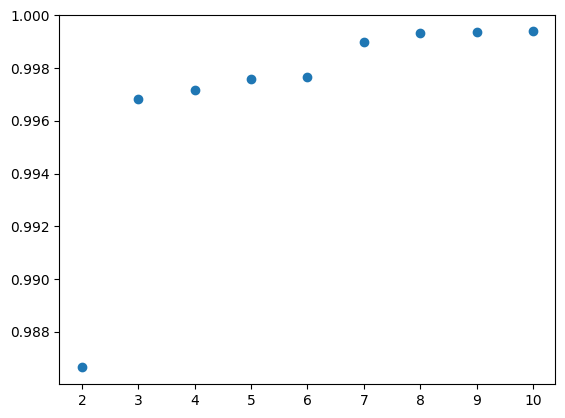

In [200]:
plt.scatter(n,error)
